## Analysis of ML Test Scores Across Batches
This notebook presents an exploratory analysis of ML test scores across three different batches. 
The objective is to compare batch-wise performance, analyze score distributions, and derive 
meaningful insights from the given data.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('scores_data.csv')

In [79]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [81]:
df.shape

(149, 3)

In [82]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [83]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


## Data Cleaning

The score column is originally provided in string format (e.g., "6/7"). 
It should be cleaned and converted into a numerical format to enable accurate statistical analysis.

In [84]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [85]:
df.columns = df.columns.str.strip()

In [86]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [97]:
df['Score'] = df['Score'].str.split('/').str[0].astype(int)

In [99]:
df['Score'].head()

0    6
1    6
2    7
3    7
4    4
Name: Score, dtype: int32

In [101]:
df['Score'].dtype

dtype('int32')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.0+ KB


## Exploratory Data Analysis

Basic descriptive statistics will be computed to understand overall and batch-wise performance.
Key metrics such as mean, median, minimum, maximum, and standard deviation will be analyzed.

In [105]:
batch_stats = df.groupby('Batch')['Score'].agg(
    Count='count',
    Mean='mean',
    Median='median',
    Min='min',
    Max='max',
    Std_Dev='std'
)

batch_stats

,Count,Mean,Median,Min,Max,Std_Dev
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,0,7,1.443376
AI_ELITE_6,48,4.229167,4.0,0,7,1.640441
AI_ELITE_7,53,5.056604,5.0,2,7,1.446682


Best performing batch is AI_ELITE_7 with highest mean 5.056 and median 5 and having no extremely low scores (min=2).
Then comes the moderate batch AI_ELITE_6 , after the best performing batch which has average performancr 4.229 with highest variability (sd) 1.64.
At last, the AI_ELITE_4 batch needs improvement for the lowest average performance score 3.791 containing zero scores.

In [107]:
def score_category(score):
    if score <= 2:
        return 'Low'
    elif score <= 5:
        return 'Medium'
    else:
        return 'High'

df['Score_Category'] = df['Score'].apply(score_category)

In [109]:
score_dist = df.groupby(['Batch', 'Score_Category']).size().unstack(fill_value=0)
score_dist

Score_Category,High,Low,Medium
Batch,,,
AI_ELITE_4,4,9,35
AI_ELITE_6,9,6,33
AI_ELITE_7,23,2,28


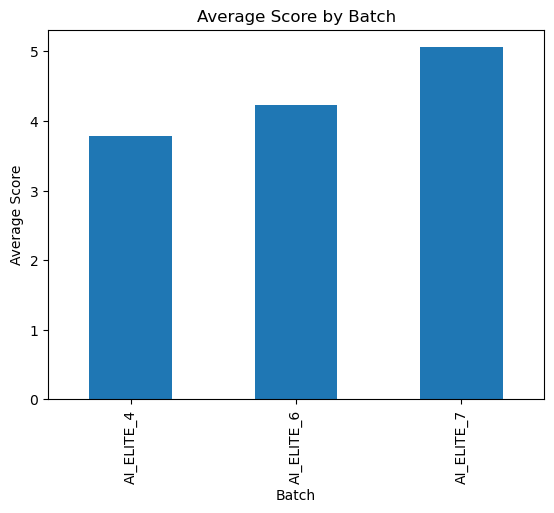

In [111]:
batch_stats['Mean'].plot(kind='bar')
plt.title('Average Score by Batch')
plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.show()

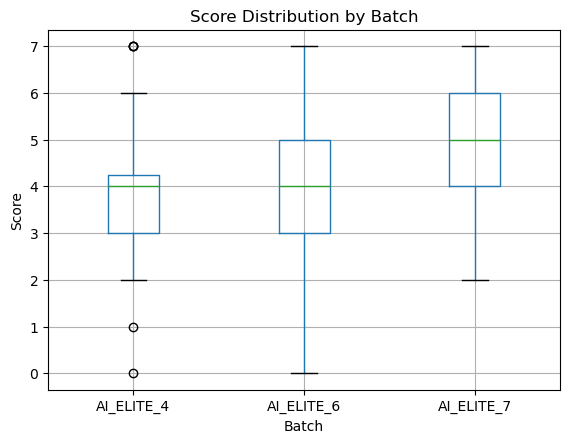

In [113]:
df.boxplot(column='Score', by='Batch')
plt.title('Score Distribution by Batch')
plt.suptitle('')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.show()

## Results and Insights

The analysis of ML test scores across three batches reveals clear performance differences. AI_ELITE_7 batch emerges as the best-performing batch with the highest average score (5.056) and median score (5), indicating strong overall understanding among students. Additionally, the absence of very low scores suggests consistent learning outcomes.

AI_ELITE_6 batch demonstrates moderate performance with a slightly higher variability in scores, indicating mixed student performance levels. AI_ELITE_4 batch records the lowest average score and includes zero scores, suggesting that some students may require additional academic support.

Overall, AI_ELITE_7 batch shows superior performance and consistency, while targeted interventions could help improve outcomes in AI_ELITE_4 batch.

## Conclusion

The analysis highlights clear performance differences across batches. 
AI_ELITE_7 demonstrates strong and consistent performance, while AI_ELITE_4 shows 
scope for improvement. These insights can help in identifying batches that may benefit 
from targeted academic interventons.
ons.
